In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

#author of the slope function: Pascal Schetelat https://github.com/pascal-schetelat
from Slope.plotSlope import slope

Esthetics settings

In [195]:
sns.set_style(
    "white", 
    {'axes.grid' : False,
     'axes.edgecolor': '#A9A9A9',
     'text.color':'#313b40'}
)
plt.rc("axes.spines", top=False, right=False)

#loading cmaps used
c_redblue = cm.get_cmap('RdBu')

#defining colors
blue = c_redblue(0.7)
blue_d = c_redblue(0.9)
red = c_redblue(0.3)
red_d = c_redblue(0.1)

sns.set_palette('Spectral')

Loading data of top 200 per each week of 2019 - data was collected from Spotify Charts (my script available in: load_data.py)<br>
Below is an exemplary 1 week top 200 songs:
https://spotifycharts.com/regional/global/weekly/2019-10-18--2019-10-25

In [151]:
RANKING_URL = 'total_spotify_top_2019.csv'
rnk_df = pd.read_csv(RANKING_URL,index_col=0)
rnk_df.columns = rnk_df.columns.str.lower()

Quick look at the data:

In [152]:
rnk_df.head(4)

,position,track name,artist,streams,url,type,week_end_d
0,1,"thank u, next",Ariana Grande,31187542,https://open.spotify.com/track/2rPE9A1vEgShuZx...,global,2019-01-04
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,30229896,https://open.spotify.com/track/3KkXRkHbMCARz0a...,global,2019-01-04
2,3,Wow.,Post Malone,29083499,https://open.spotify.com/track/6MWtB6iiXyIwun0...,global,2019-01-04
3,4,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,24784744,https://open.spotify.com/track/4w8niZpiMy6qz1m...,global,2019-01-04


### Christmas time analysis

Because end of year is Christmas time I am curious if Christmas songs are really that popular I will check top 10 streams for the last week of the year and see which songs are most popular. What is more I will show how their no of streams has changed in the past 5 weeks before Christmas.

In [153]:
# adding artist_track column
cols = ['artist','track name']
rnk_df['artist_track'] = rnk_df[cols].apply(lambda x: ': '.join([c for c in x]), axis=1)

# pivot data from long to wide format (for visualization purposes)
# + choosing top 10 streamed songs during Christmast week and 5 weeks before them

rnk_pivot_df = (
    rnk_df.pivot_table(index=['artist_track'], columns='week_end_d', values='streams')
          .sort_values('2019-12-27', ascending=False)
          .iloc[:10,-6:] # last 10 rows present top 10 songs for last week of the year
)
rnk_pivot_df.columns = rnk_pivot_df.columns.values
rnk_pivot_df = rnk_pivot_df.astype('float')

E. Tufte Slope Graph
(author of the slope function: Pascal Schetelat https://github.com/pascal-schetelat)

Growing popularity of christmas songs (marked red line). <br>
How did the no. of weekly streams changed during 6 weeks before year ends

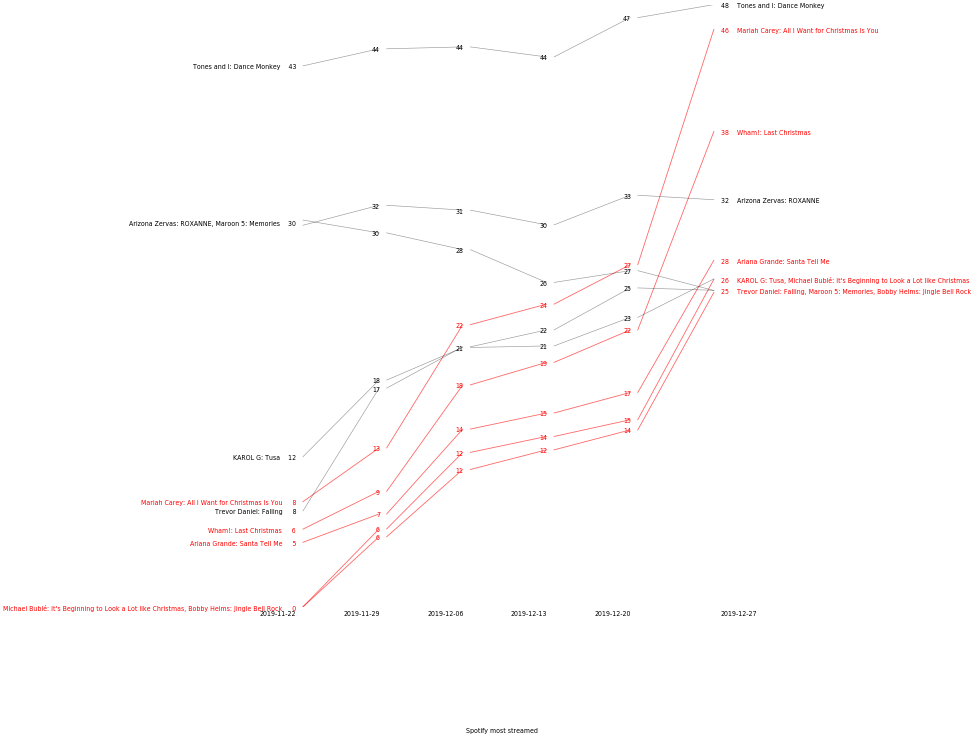

In [154]:
christmas_songs = ['Santa Tell Me','It\'s Beginning to Look a Lot like Christmas',
                   'Jingle Bell Rock', 'All I Want for Christmas Is You',
                   'Rockin\' Around The Christmas Tree', 'Wham!: Last Christmas']
                   
colors_mapped ={song:'red' for song in christmas_songs}

f = slope(rnk_pivot_df.fillna(0)/1000000,
          kind='interval',
          height= 28,
          width=18,
          font_size=15,
          color=colors_mapped,
          title = 'Spotify most streamed',
          marker='%0.f')

Whoa! It looks like we do really listen to christmas songs during winter time, from approx. 0-10 mln streams per christmas song in the week ending 2019-11-22 to top 10 songs in the last week of the year.

Below table with no. of streams in mln per each of the top 10 songs (2019-12-27)

In [155]:
#numbers in millions
rnk_pivot_df.fillna(0)/1000000

,2019-11-22,2019-11-29,2019-12-06,2019-12-13,2019-12-20,2019-12-27
artist_track,,,,,,
Tones and I: Dance Monkey,42.934057,44.289739,44.439902,43.643723,46.760593,47.797217
Mariah Carey: All I Want for Christmas Is You,8.344450,12.612693,22.394175,24.024043,27.155209,45.828931
Wham!: Last Christmas,6.166454,9.167657,17.615075,19.402441,21.975011,37.725693
Arizona Zervas: ROXANNE,30.284841,31.871446,31.485166,30.315675,32.668758,32.309199
Ariana Grande: Santa Tell Me,5.121609,7.367685,14.107437,15.382577,17.011748,27.506141
KAROL G: Tusa,11.911506,17.995065,20.584187,20.705354,22.973234,26.024449
Michael Bublé: It's Beginning to Look a Lot like Christmas,0.000000,6.183295,12.258394,13.521227,14.847978,25.997383
Trevor Daniel: Falling,7.610731,17.357222,20.635758,21.977727,25.310607,25.122335
Maroon 5: Memories,30.696174,29.678784,28.348963,25.747069,26.681377,25.107372


5/10 top streamed songs on Spotify during the week ending 2019-12-27 are christmas related song, this is crazy.

In [156]:
rnk_pivot_df = rnk_df.pivot_table(index=['artist_track'], columns='week_end_d', values='streams')

### Top streamed for the whole 2019 
Some track were produced during 2019, so they are not comparable, but the aim is to see which tracks were most popular, not those that will have in total the highest no of streams in general.

In [157]:
(rnk_df.fillna(0).groupby(['track name','artist'])
                 .agg({'streams':'sum'})
                 .sort_values('streams', ascending=False).head(10)
                 .style.format('{:,.0f}'))

,,streams
track name,artist,
Señorita,Shawn Mendes,"1,081,998,529"
bad guy,Billie Eilish,"1,053,456,087"
Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,"1,018,288,528"
7 rings,Ariana Grande,"976,173,692"
Someone You Loved,Lewis Capaldi,"831,741,702"
I Don't Care (with Justin Bieber),Ed Sheeran,"820,322,424"
Wow.,Post Malone,"775,156,628"
Dance Monkey,Tones and I,"745,353,098"
Shallow,Lady Gaga,"728,673,266"


Which songs were among top200 for the longest no. of weeks and how long was that? + How many streams did they have?

In [158]:
def longest_inside_top200(rnk_df):
    rnk_pos_df = (
        rnk_df.groupby(['track name','artist'])
              .agg({'position':'count',
                    'streams':'sum'})
              .sort_values('streams', ascending=False)
    )
    
    return rnk_pos_df[rnk_pos_df['position'] == rnk_pos_df['position'].max()].style.format('{:,.0f}')

longest_inside_top200(rnk_df)

,,position,streams
track name,artist,,
Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,52,"1,018,288,528"
Wow.,Post Malone,52,"775,156,628"
Shallow,Lady Gaga,52,"728,673,266"
Happier,Marshmello,52,"634,161,629"
Without Me,Halsey,52,"625,547,718"
"thank u, next",Ariana Grande,52,"620,009,088"
Sweet but Psycho,Ava Max,52,"601,854,032"
when the party's over,Billie Eilish,52,"532,075,896"
SICKO MODE,Travis Scott,52,"468,880,652"


There were 17 songs that did not leave the top 200 list during every week of 2019.

### How long does the top song remained in the list (counting consecutive sequences)? <br>
Below is the distribuion of longest sequence per each track that was at least once in the top 200 during 2019.<br>
Please note that those durations will be affected (lowered) by the fact that we do not know how will top 200 of the last week of December perform in the future (here for the sake of simplicity it is assumed that their sequence is finished). 

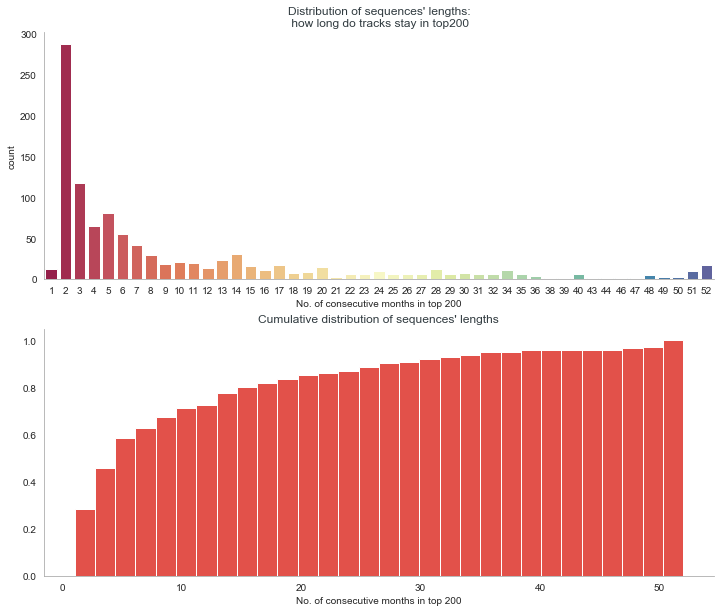

In [203]:
def analyse_sequences(rnk_pivot_df):
    
    rnk_processed_df = rnk_pivot_df.T.isnull()
    seq_data = rnk_processed_df.cumsum().apply(lambda x: np.max(pd.value_counts(x)))
    seq_data_grp = rnk_processed_df.cumsum().apply(lambda x: np.max(pd.value_counts(x))).value_counts().sort_index(ascending=False)
    
    fig, axs = plt.subplots(2,1, figsize=(12,10))
    
    sns.despine()
    axs[0].title.set_text('Distribution of sequences\' lengths:\n how long do tracks stay in top200')
    axs[0].set_xlabel('No. of consecutive months in top 200')
    sns.countplot(seq_data, palette='Spectral',ax=axs[0])
    axs[1].title.set_text('Cumulative distribution of sequences\' lengths')
    axs[1].hist(seq_data,cumulative=True, density=True, bins=30)
    axs[1].set_xlabel('No. of consecutive months in top 200')
    
    return seq_data

seq_data = analyse_sequences(rnk_pivot_df)

In [197]:
seq_data.describe()

count    1058.000000
mean       10.329868
std        12.072153
min         1.000000
25%         2.000000
50%         5.000000
75%        14.000000
max        52.000000
dtype: float64

We can see that being in the top on Spotify is rather not easy to maintain - mode was 2 weeks and in general we can see that vast majority (approx. 70% of tracks) leave top200 list before 10th consequtive week. 

### Deeper dive - getting and understanding top songs audio features

Now I will try to enrich this dataset and download some metadata regarding top songs. I will search for each track spotify id to be able to download data on audio features through Spotify API.<br>
Here is the reference:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

In [282]:
SPOTIFY_ID = None # put your spotify app id here
SPOTIFY_SECRET = None #put your secret here

client_credentials_manager = (
    SpotifyClientCredentials(
        client_id=SPOTIFY_ID, 
        client_secret=SPOTIFY_SECRET)
    )

spotify = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Generate distinct pairs - artists-track_name

In [283]:
distinct_artists_tracks = rnk_df[['track name','artist']].drop_duplicates().values
distinct_artists_tracks[0]

array(['thank u, next', 'Ariana Grande'], dtype=object)

In [316]:
def get_track_metadata(t_name, a_name):
    '''Downloads metadata for a specific track name and artist name:
        - track id (needed to enrich data at the later stage)
        - album name and its release date
    '''

    q = "track: {t_name} artist: {a_name}".format(t_name=t_name,
                                                  a_name=a_name)

    track_items = spotify.search(q=q)['tracks']['items']
    results = {}
    for match_position, item in enumerate(track_items):
        track_id = item['id']
        track_name = item['name']
        artist_name = item['artists'][0]['name']

        album_data = item['album']
        album_name = album_data['name']
        album_r_date = album_data['release_date']

        results[track_id] = [track_name, album_name, artist_name, album_r_date, match_position]
        
    return results

def get_metadata_df(artist_tracks):
    '''Downloads metadata for all track-artist paris.
    Output: pandas df'''
    
    df = pd.DataFrame()
    for item in artist_tracks:
        t_name, a_name = item 
        results = get_track_metadata(t_name, a_name)
        results_df = pd.DataFrame(results).T
        df = df.append(results_df)    
    
    return df
    
res =  get_metadata_df(distinct_artists_tracks[:3])

Getting metadata for all top songs

In [320]:
metadata_df = get_metadata_df(distinct_artists_tracks)

Saving metadata for future use:

In [323]:
metadata_df.to_csv('total_spotify_top_2019_meta.csv')

Getting audio features for top songs:

In [363]:
def get_audio_analysis(track_idx_lst):
    '''Downloads audio analysis data for all track ids provided.
    Output is a pandas df.'''
    
    idx = 0
    step = 50
    audio_results_df = pd.DataFrame()
    
    while idx < len(track_idx_lst):
        meta_idx_lst = track_idx_lst[idx:idx+50]
        audio_analysis = spotify.audio_features(meta_idx_lst)
        results_df = pd.DataFrame({meta_idx_lst[idx]:analysis for idx,analysis in enumerate(audio_analysis)}).T
        audio_results_df = audio_results_df.append(results_df)
        idx+=step
        
    return audio_results_df

In [ ]:
audio_results_df = get_audio_analysis(metadata_df.index.values)

Let's look at the output tables:

In [446]:
audio_results_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
3e9HZxeyfWwjeyPAMmWSSQ,0.717,0.653,1,-5.634,1,0.0658,0.229,0,0.101,0.412,106.966,audio_features,3e9HZxeyfWwjeyPAMmWSSQ,spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,https://api.spotify.com/v1/tracks/3e9HZxeyfWwj...,https://api.spotify.com/v1/audio-analysis/3e9H...,207320,4
6AZaeRAPYnf5nKwV7HpSlQ,0.43,0.811,1,-5.511,1,0.101,0.027,0.0034,0.95,0.223,107.036,audio_features,6AZaeRAPYnf5nKwV7HpSlQ,spotify:track:6AZaeRAPYnf5nKwV7HpSlQ,https://api.spotify.com/v1/tracks/6AZaeRAPYnf5...,https://api.spotify.com/v1/audio-analysis/6AZa...,389728,4
4KBx9DSSbFaumwlEqjX4CP,0.743,0.662,1,-5.745,1,0.0534,0.268,1.36e-06,0.102,0.408,107.027,audio_features,4KBx9DSSbFaumwlEqjX4CP,spotify:track:4KBx9DSSbFaumwlEqjX4CP,https://api.spotify.com/v1/tracks/4KBx9DSSbFau...,https://api.spotify.com/v1/audio-analysis/4KBx...,207320,4
2IgQVWTHQGtQBIAJker7ml,0.741,0.686,1,-5.095,1,0.0546,0.22,1.81e-06,0.114,0.393,106.906,audio_features,2IgQVWTHQGtQBIAJker7ml,spotify:track:2IgQVWTHQGtQBIAJker7ml,https://api.spotify.com/v1/tracks/2IgQVWTHQGtQ...,https://api.spotify.com/v1/audio-analysis/2IgQ...,204280,4
3KkXRkHbMCARz0aVfEt68P,0.76,0.479,2,-5.574,1,0.0466,0.556,0,0.0703,0.913,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4


In [453]:
metadata_df.head(2)

,track_name,album_name,artist_name,album_r_date,match_position
3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","thank u, next",Ariana Grande,2019-02-08,0
6AZaeRAPYnf5nKwV7HpSlQ,"thank u, next - live",k bye for now (swt live),Ariana Grande,2019-12-23,1


I will choose add names to metadata df

In [451]:
meta_colnames = ['track_name', 'album_name', 'artist_name', 'album_r_date', 'match_position']
metadata_df.columns = meta_colnames

In [452]:
metadata_df.head()

,track_name,album_name,artist_name,album_r_date,match_position
3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","thank u, next",Ariana Grande,2019-02-08,0
6AZaeRAPYnf5nKwV7HpSlQ,"thank u, next - live",k bye for now (swt live),Ariana Grande,2019-12-23,1
4KBx9DSSbFaumwlEqjX4CP,"thank u, next","thank u, next",Ariana Grande,2018-02-07,2
2IgQVWTHQGtQBIAJker7ml,"thank u, next","NOW That's What I Call Music!, Vol. 70",Ariana Grande,2019-05-03,3
3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,Post Malone,2018-12-14,0


I think for the purpose of this analysis I will narrow down matches to first match -i.e. ```match_position``` param equals 0

In [454]:
metadata_first_df = metadata_df[metadata_df['match_position'] == 0]

Now let's join 2 tables: 
- first with top songs spotify id - track+artist name mapping with
- second regarding audio features of tracks 

In [460]:
metadata_first_df.shape, audio_results_df.shape

((1023, 5), (3479, 18))

I suspect there are some duplicates in both tables - I will get rid of duplicated spotify ids in both tables before joining tables to avoid many-to-many joining issue.

In [471]:
metadata_first_df = metadata_first_df.drop_duplicates()

In [474]:
audio_results_df = audio_results_df.drop_duplicates()

In [477]:
tracks_analysis_df = metadata_first_df.merge(audio_results_df, left_index=True, right_index=True, how='inner')

In [478]:
metadata_first_df.shape, tracks_analysis_df.shape, audio_results_df.shape

((994, 5), (994, 23), (3382, 18))

In [479]:
tracks_analysis_df.head()

,track_name,album_name,artist_name,album_r_date,match_position,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","thank u, next",Ariana Grande,2019-02-08,0,0.717,0.653,1,-5.634,1,...,0.101,0.412,106.966,audio_features,3e9HZxeyfWwjeyPAMmWSSQ,spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,https://api.spotify.com/v1/tracks/3e9HZxeyfWwj...,https://api.spotify.com/v1/audio-analysis/3e9H...,207320,4
3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Soundtrack ...,Post Malone,2018-12-14,0,0.76,0.479,2,-5.574,1,...,0.0703,0.913,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4
7xQAfvXzm3AkraOtGPWIZg,Wow.,Hollywood's Bleeding,Post Malone,2019-09-06,0,0.829,0.539,11,-7.359,0,...,0.103,0.388,99.96,audio_features,7xQAfvXzm3AkraOtGPWIZg,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4
4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)","Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,2018-09-28,0,0.842,0.801,8,-4.167,0,...,0.0642,0.617,95.881,audio_features,4w8niZpiMy6qz1mntFA5uM,spotify:track:4w8niZpiMy6qz1mntFA5uM,https://api.spotify.com/v1/tracks/4w8niZpiMy6q...,https://api.spotify.com/v1/audio-analysis/4w8n...,212500,4
5p7ujcrUXASCNwRaWNHR1C,Without Me,Without Me,Halsey,2018-10-04,0,0.752,0.488,6,-7.05,1,...,0.0936,0.533,136.041,audio_features,5p7ujcrUXASCNwRaWNHR1C,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4


In [480]:
tracks_analysis_df.columns

Index(['track_name', 'album_name', 'artist_name', 'album_r_date',
       'match_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [441]:
# Mapping of keys integers to tones
# https://en.wikipedia.org/wiki/Pitch_class

Next steps (tbc):

- analysis of top songs acoustic features
- do top performers (i.e. songs that stayed in the top songs for more than 14 weeks (75th percentile) differ from rest of top songs?) 